In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sys

from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [50]:
data = pd.read_csv("DataSets/Sales-Export_2019-2020.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


In [51]:
del data["order_id"]


data.columns = ["Country","Order Value EUR","Cost","Date","Category","Customer Name","Sales Manager","Sales Rep","Device Type"]

data["Month"] = data["Date"].str.split("/").str[0] 

data = pd.DataFrame(data,columns=["Country","Order Value EUR","Cost","Date","Month","Category","Customer Name","Sales Manager","Sales Rep","Device Type"])

data["Month"] = data["Month"].astype("int32")

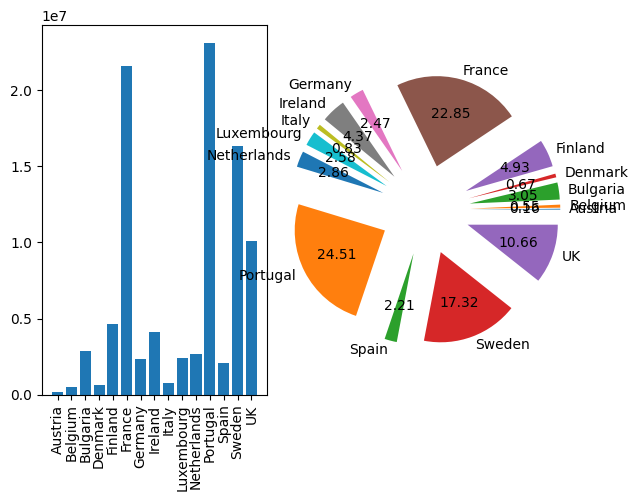

In [52]:


def showgraph(colname,colname2):

    x = data.groupby([colname])[colname2].sum().sort_index()
    
    plt.subplot(1,2,1)   
    
    plt.bar(x.index,x)

    plt.xticks(rotation="vertical")

    plt.subplot(1,2,2)
    y = len(x)
    
    plt.pie(x,labels=x.index,explode=[0.5]*y,autopct="%.2f")

    plt.show()
    
showgraph("Country","Cost")

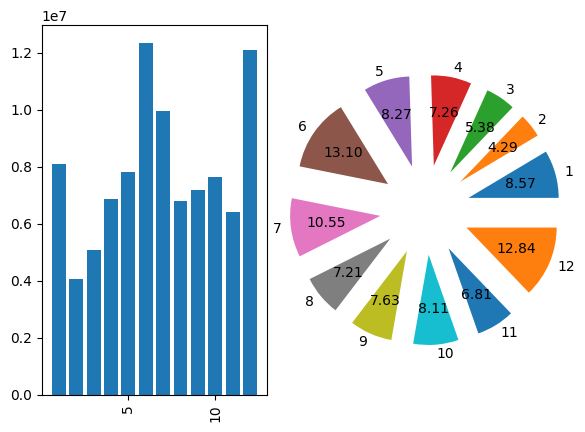

In [53]:
data["Date"] = pd.to_datetime(data["Date"])

data = data.sort_values(by=["Date"])

y = data.groupby(["Month"])["Cost"].sum().sort_index()

showgraph("Month","Cost")


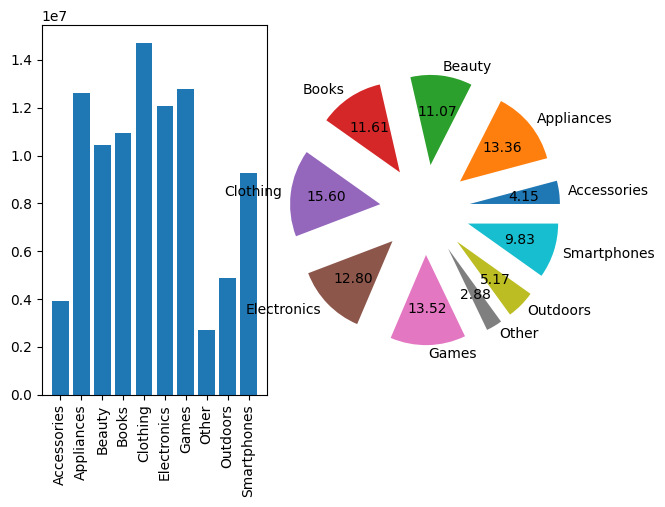

In [54]:
showgraph("Category","Cost")

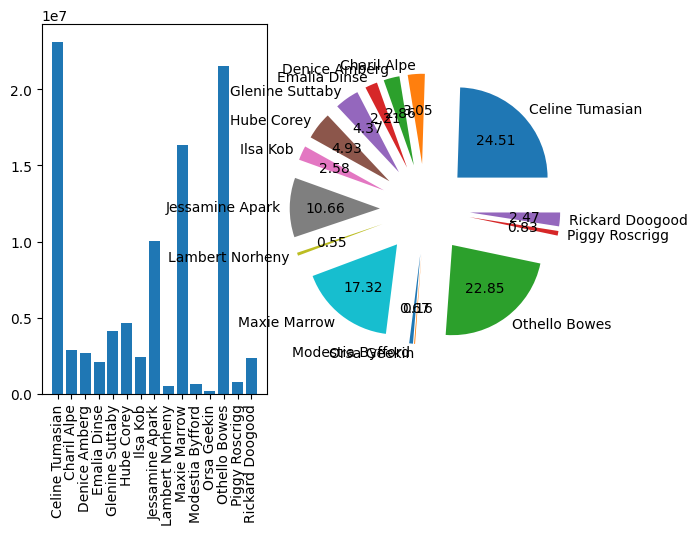

In [55]:
showgraph("Sales Manager","Cost")

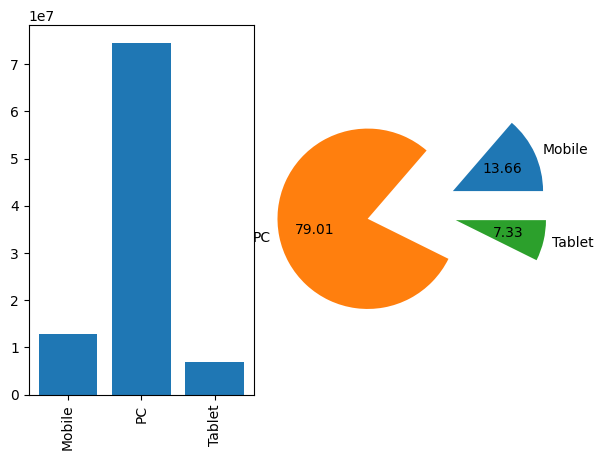

In [56]:
showgraph("Device Type","Cost")